In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
#import labelencoder
from sklearn.preprocessing import LabelEncoder
#import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
#import randomized search cv
from sklearn.model_selection import RandomizedSearchCV
#import pipeline
from sklearn.pipeline import Pipeline
#import precision score
from sklearn.metrics import precision_score
#import recall score
from sklearn.metrics import recall_score
#import f1 score
from sklearn.metrics import f1_score
#import random under sampler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
#show all columns
pd.set_option('display.max_columns', None)

In [3]:
filepath='/Users/rianrachmanto/pypro/data/loan_final313.csv'
#display all columns
pd.set_option('display.max_columns', None)

def loaddata(pathfile):
    df=pd.read_csv(pathfile)
    print(df.head())
    print(df.columns)
    #print unique id
    print(df['id'].nunique())
    #reset index
    df=df.reset_index(drop=True)

    #convert issue_d to datetime
    df['issue_d']=pd.to_datetime(df['issue_d'])

    #convert final_d to datetime
    df['final_d'] = pd.to_datetime(df['final_d'], format='%m%d%Y')


    print('Inspect the imbalance: ',df['loan_condition'].value_counts(normalize=True))    
   
    
    #set x and y
    X=df.drop(['loan_condition_cat'],axis=1)
    y=df['loan_condition_cat']
    #split data
    X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

    return X_train,X_test,y_train,y_test

In [4]:
X_train, X_test, y_train, y_test=loaddata(filepath)

        id  year     issue_d  final_d  emp_length_int home_ownership  \
0  1077501  2011  01/12/2011  1012015            10.0           RENT   
1  1077430  2011  01/12/2011  1042013             0.5           RENT   
2  1077175  2011  01/12/2011  1062014            10.0           RENT   
3  1076863  2011  01/12/2011  1012015            10.0           RENT   
4  1075358  2011  01/12/2011  1012016             1.0           RENT   

   home_ownership_cat income_category  annual_inc  income_cat  loan_amount  \
0                   1             Low       24000           1         5000   
1                   1             Low       30000           1         2500   
2                   1             Low       12252           1         2400   
3                   1             Low       49200           1        10000   
4                   1             Low       80000           1         3000   

         term  term_cat application_type  application_type_cat  \
0   36 months         1       IN

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621165 entries, 696983 to 438089
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    621165 non-null  int64         
 1   year                  621165 non-null  int64         
 2   issue_d               621165 non-null  datetime64[ns]
 3   final_d               621165 non-null  datetime64[ns]
 4   emp_length_int        621165 non-null  float64       
 5   home_ownership        621165 non-null  object        
 6   home_ownership_cat    621165 non-null  int64         
 7   income_category       621165 non-null  object        
 8   annual_inc            621165 non-null  int64         
 9   income_cat            621165 non-null  int64         
 10  loan_amount           621165 non-null  int64         
 11  term                  621165 non-null  object        
 12  term_cat              621165 non-null  int64         

In [6]:
def new_eda(X_train,y_train):
    y_train.columns=['loan_condition_cat']
    eda_train=pd.concat([X_train,y_train],axis=1)
    numeric_cols=eda_train[['emp_length_int','annual_inc',
                            'loan_amount','interest_rate','dti','total_pymnt',
                            'total_rec_prncp','recoveries','installment']]

    #print missing values
    print(eda_train.isnull().sum())

    def describe_numeric(eda_train):
        for col in numeric_cols:
            print('Describe for column: ',col)
            print(eda_train[col].describe())
            plt.figure(figsize=(10,8))
            sns.histplot(data=eda_train,x=col)
            plt.show()
            plt.figure(figsize=(10,8))
            sns.boxplot(data=eda_train,x='loan_condition_cat', y=col)
            plt.show()
            plt.figure(figsize=(10,8))
            sns.kdeplot(data=eda_train,x=col, hue='loan_condition_cat')
            plt.show()
            print('Describe for column devided by loan condition:')
            print(eda_train.groupby('loan_condition_cat')[col].describe())
            print('-----------------------------------------------------------')
    describe_numeric(eda_train)

    plt.figure(figsize=(20,20))
    sns.heatmap(X_train.corr(),annot=True)
    plt.show()

    return eda_train

    

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
loan_condition_cat      0
dtype: int64
Describe for column:  emp_length_int
count    621165.000000
mean          6.052788
std           3.505494
min           0.500000
25%           3.000000
50%           6.050000
75%          10.000000
max      

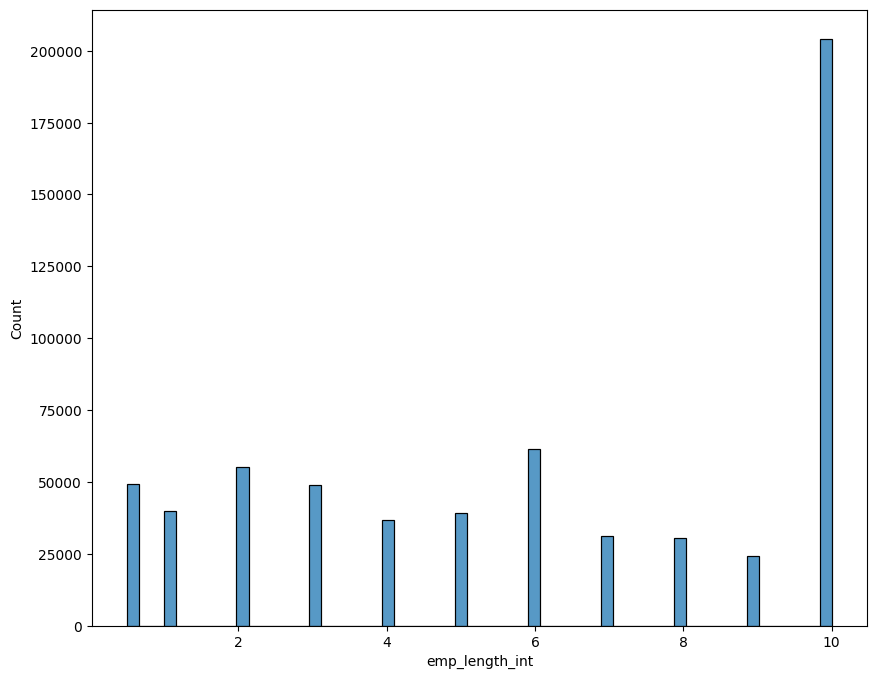

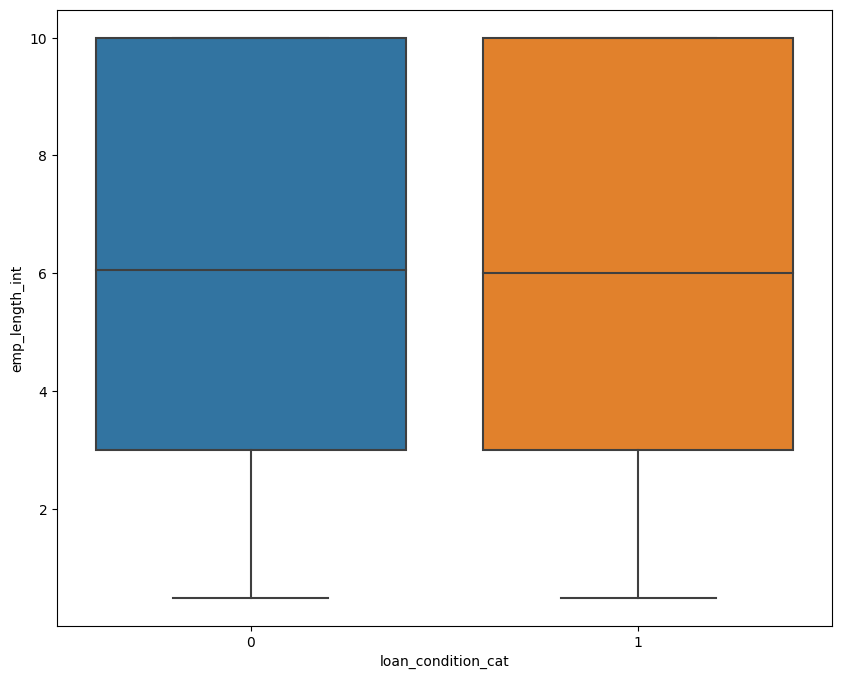

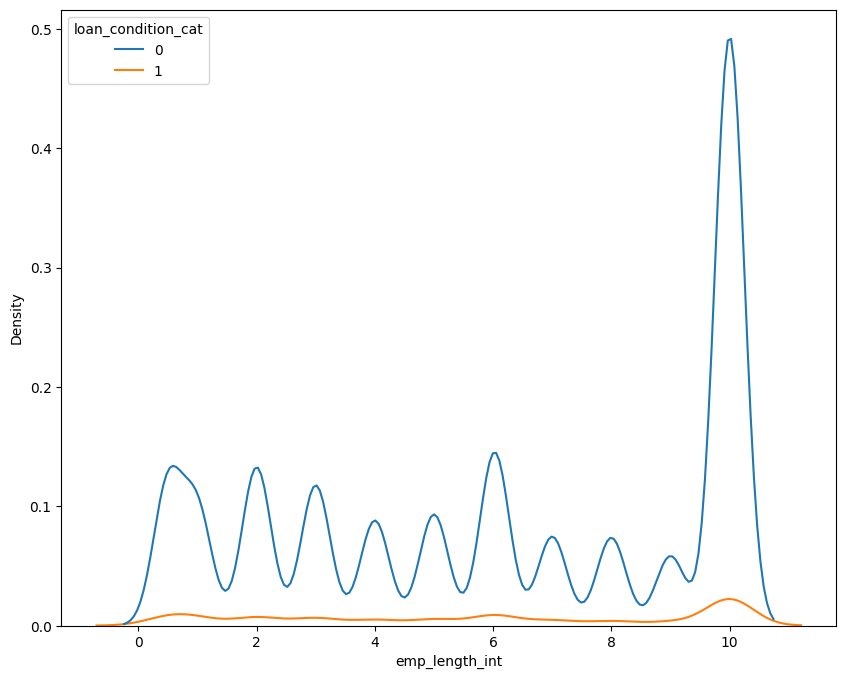

Describe for column devided by loan condition:
                       count      mean       std  min  25%   50%   75%   max
loan_condition_cat                                                          
0                   573965.0  6.068791  3.508268  0.5  3.0  6.05  10.0  10.0
1                    47200.0  5.858193  3.465716  0.5  3.0  6.00  10.0  10.0
-----------------------------------------------------------
Describe for column:  annual_inc
count    6.211650e+05
mean     7.496649e+04
std      6.308381e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.485000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64


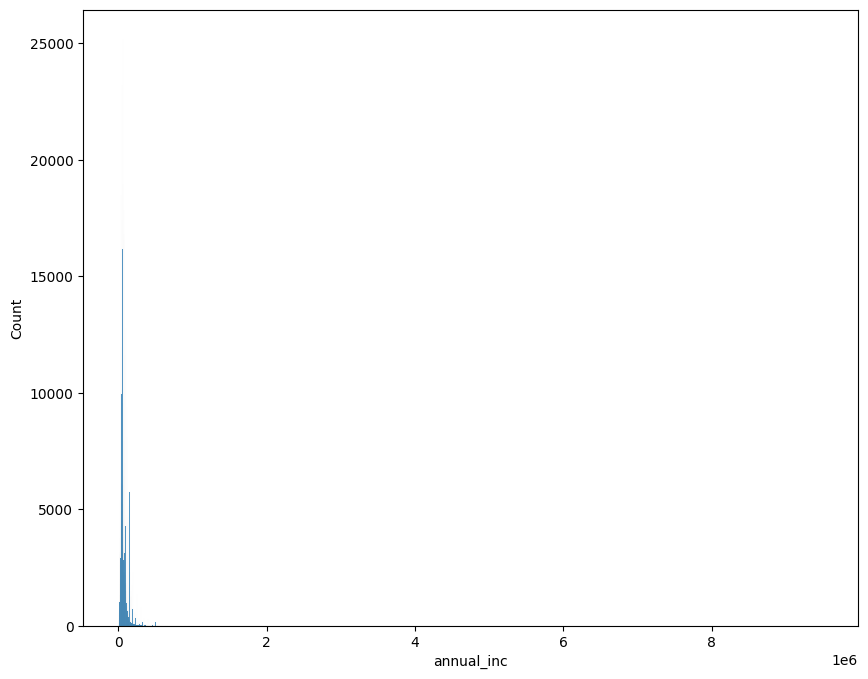

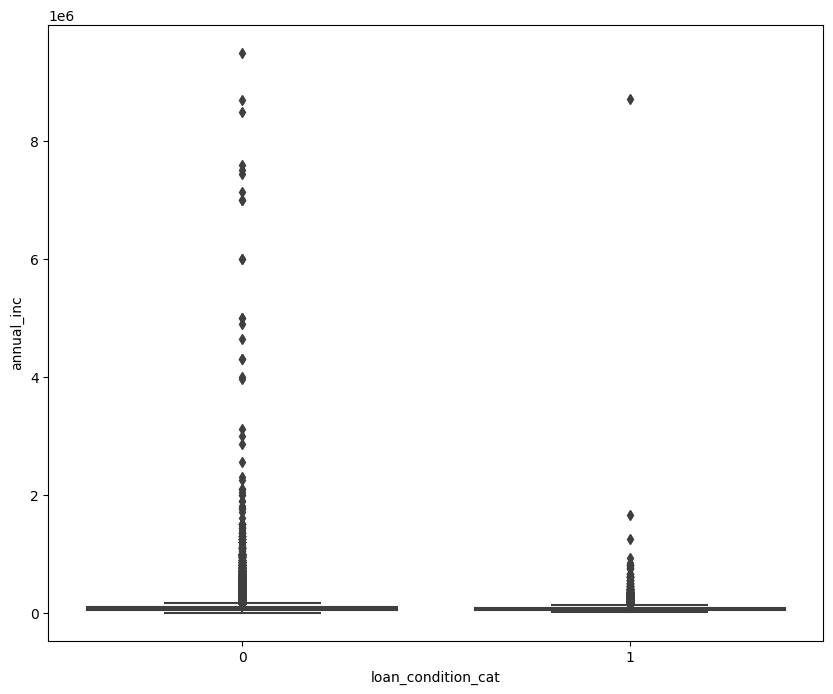

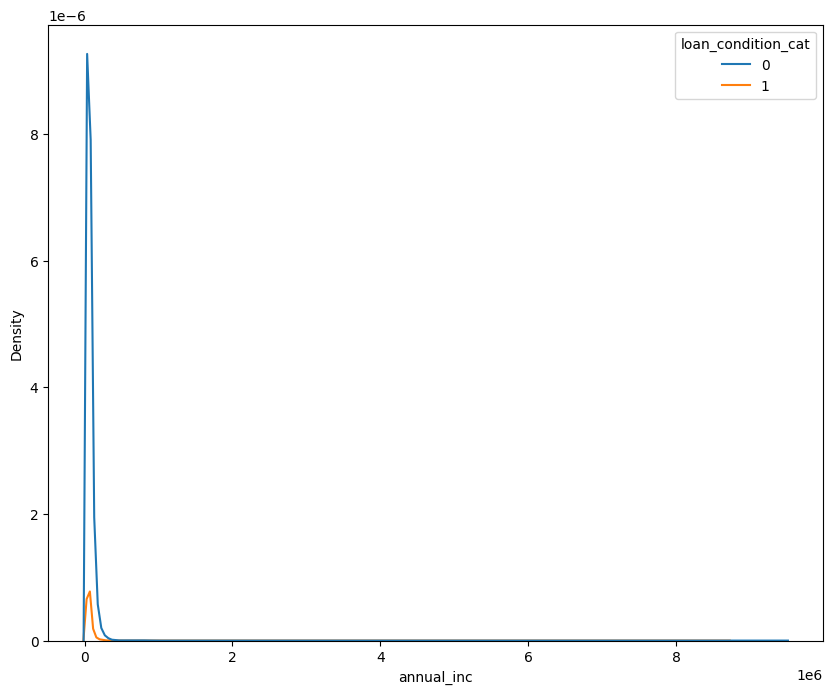

Describe for column devided by loan condition:
                       count          mean           std     min      25%  \
loan_condition_cat                                                          
0                   573965.0  75602.122389  63401.471623     0.0  46000.0   
1                    47200.0  67236.994004  58535.303024  4080.0  42000.0   

                        50%      75%        max  
loan_condition_cat                               
0                   65000.0  90000.0  9500000.0  
1                   58000.0  80000.0  8706582.0  
-----------------------------------------------------------
Describe for column:  loan_amount
count    621165.000000
mean      14757.380326
std        8437.661978
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amount, dtype: float64


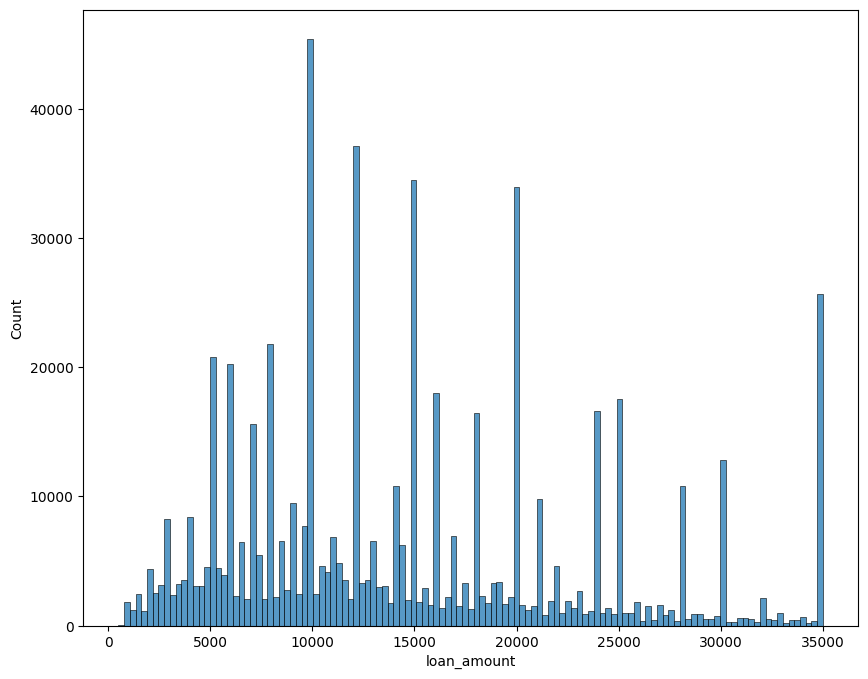

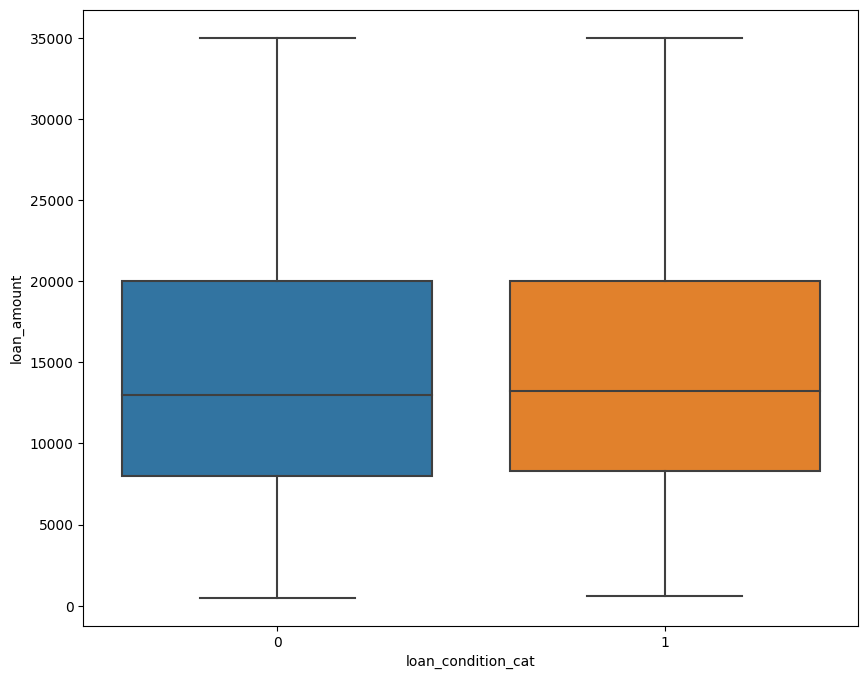

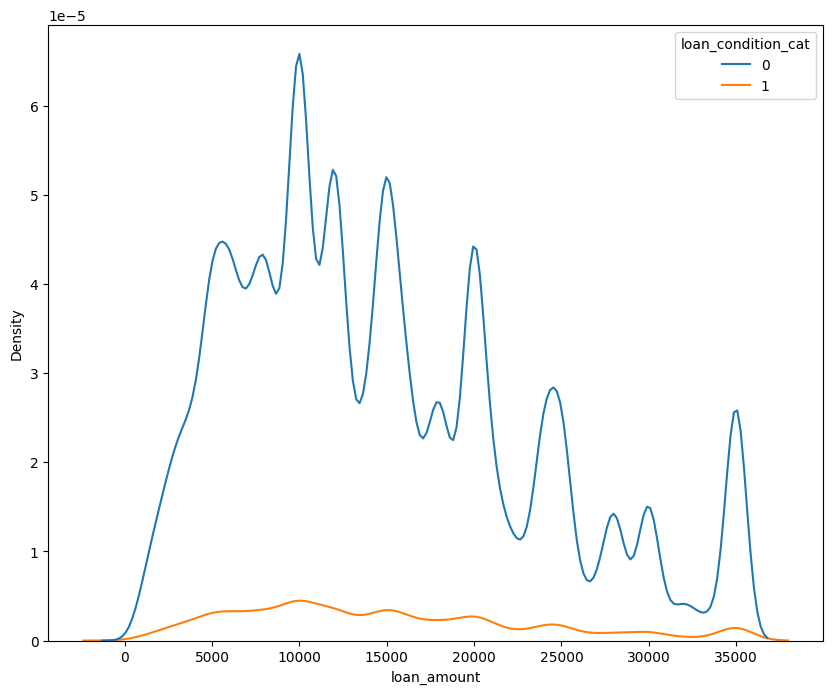

Describe for column devided by loan condition:
                       count          mean          std    min     25%  \
loan_condition_cat                                                       
0                   573965.0  14746.736865  8433.011825  500.0  8000.0   
1                    47200.0  14886.807733  8493.028056  600.0  8325.0   

                        50%      75%      max  
loan_condition_cat                             
0                   13000.0  20000.0  35000.0  
1                   13200.0  20000.0  35000.0  
-----------------------------------------------------------
Describe for column:  interest_rate
count    621165.000000
mean         13.246752
std           4.381764
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64


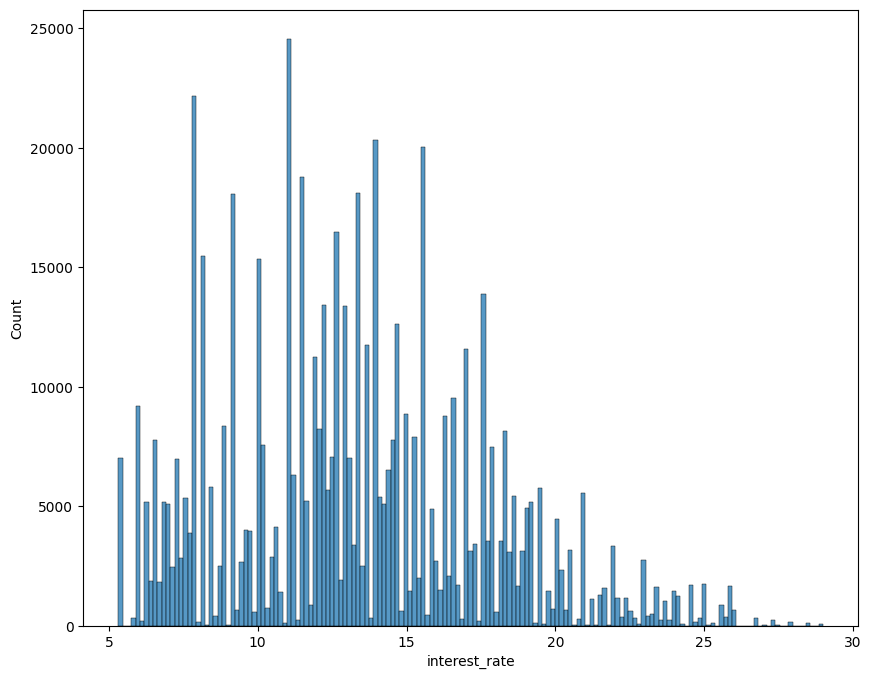

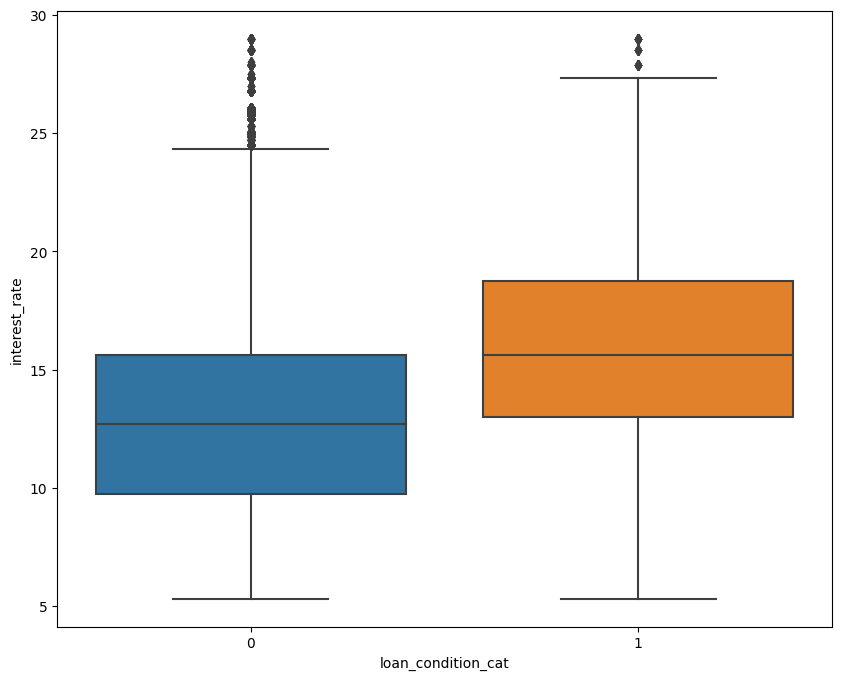

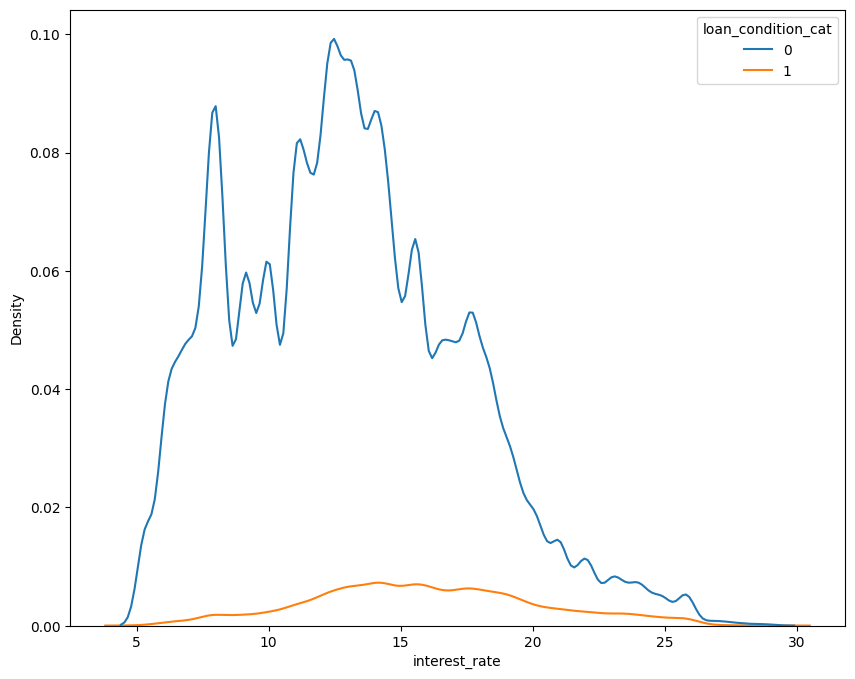

Describe for column devided by loan condition:
                       count       mean       std   min    25%    50%    75%  \
loan_condition_cat                                                             
0                   573965.0  13.025092  4.312289  5.32   9.76  12.69  15.61   
1                    47200.0  15.942199  4.322308  5.32  12.99  15.61  18.75   

                      max  
loan_condition_cat         
0                   28.99  
1                   28.99  
-----------------------------------------------------------
Describe for column:  dti
count    621165.000000
mean         18.181512
std          19.795927
min           0.000000
25%          11.930000
50%          17.670000
75%          23.960000
max        9999.000000
Name: dti, dtype: float64


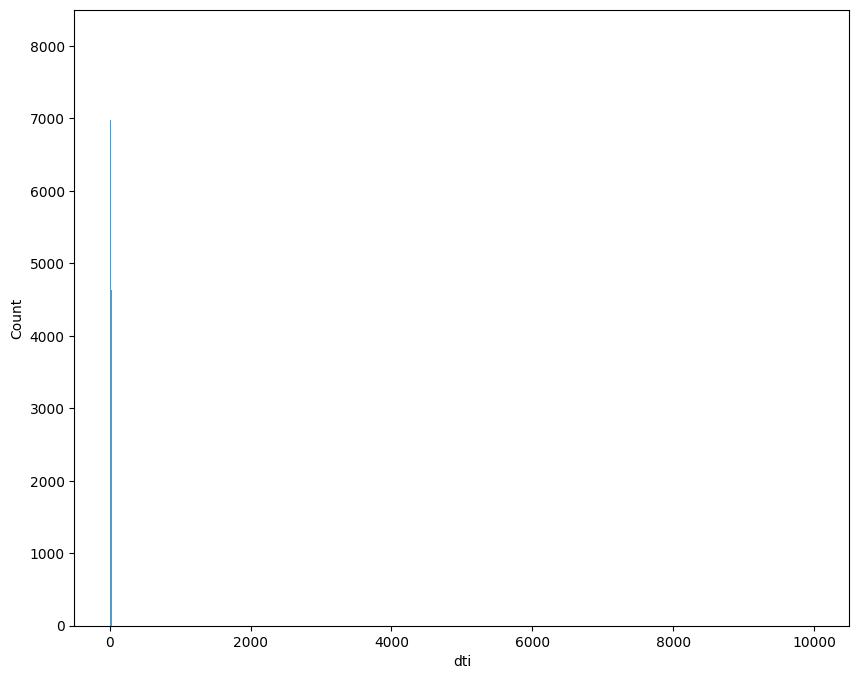

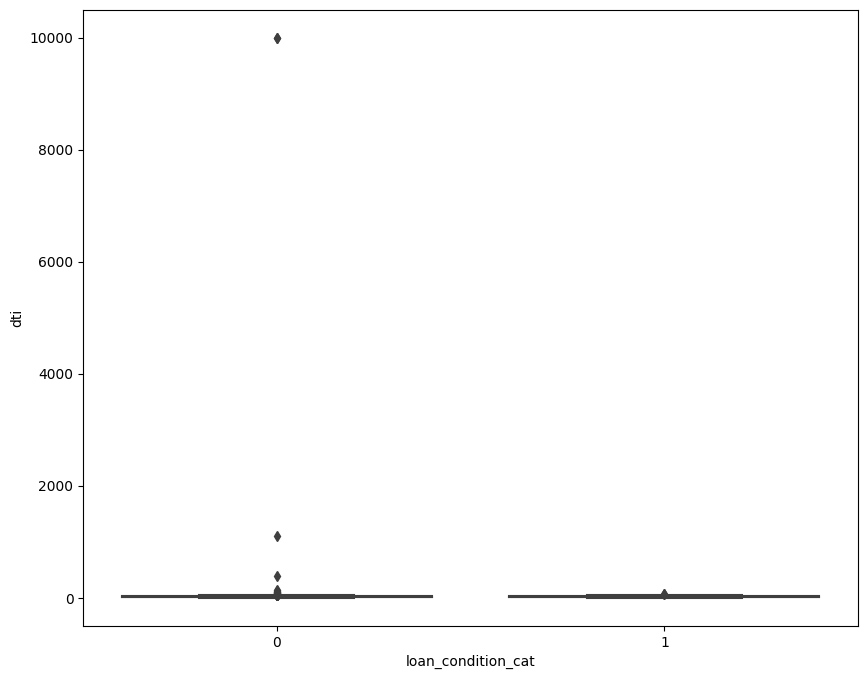

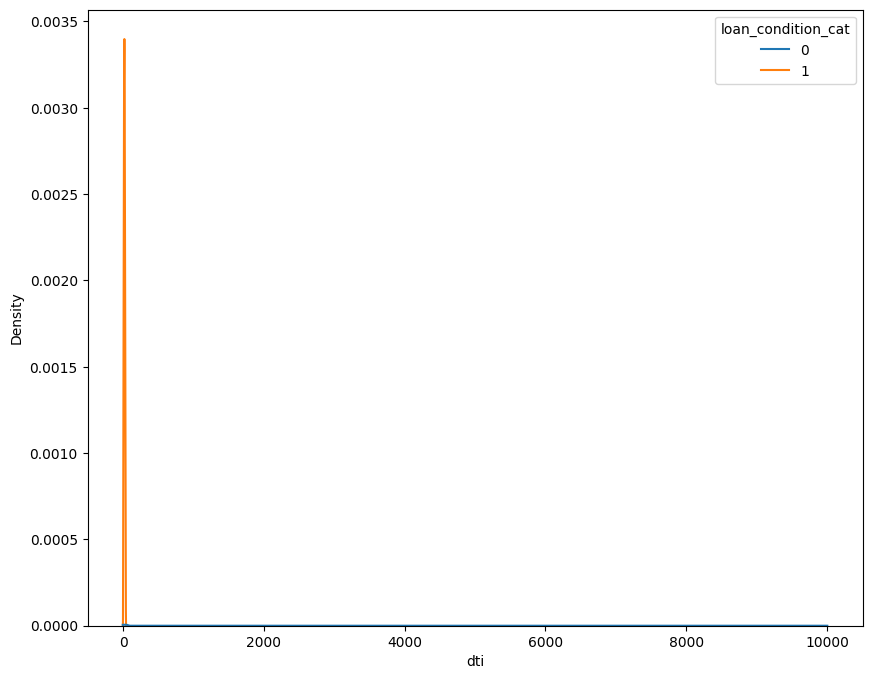

Describe for column devided by loan condition:
                       count       mean        std  min    25%     50%  \
loan_condition_cat                                                       
0                   573965.0  18.134060  20.460361  0.0  11.86  17.590   
1                    47200.0  18.758549   8.140124  0.0  12.78  18.625   

                        75%      max  
loan_condition_cat                    
0                   23.9000  9999.00  
1                   24.5525    59.26  
-----------------------------------------------------------
Describe for column:  total_pymnt
count    621165.000000
mean       7559.120502
std        7872.729861
min           0.000000
25%        1911.900000
50%        4891.250000
75%       10627.080000
max       57777.579870
Name: total_pymnt, dtype: float64


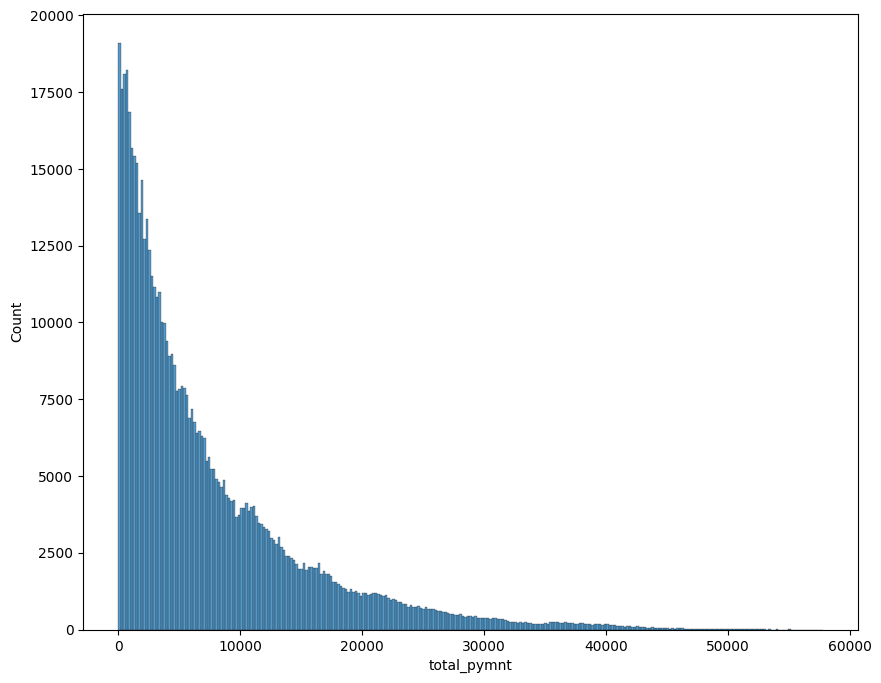

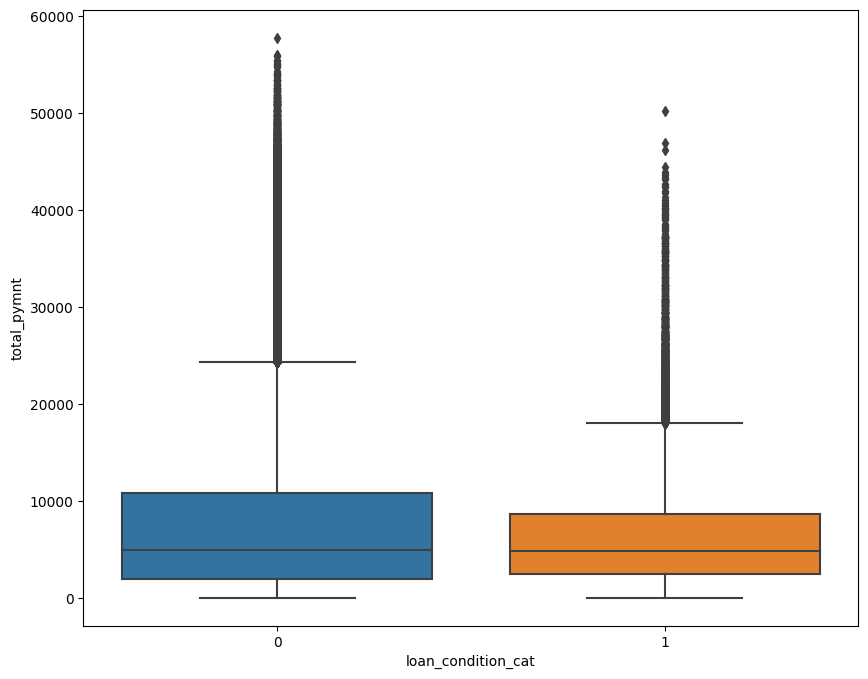

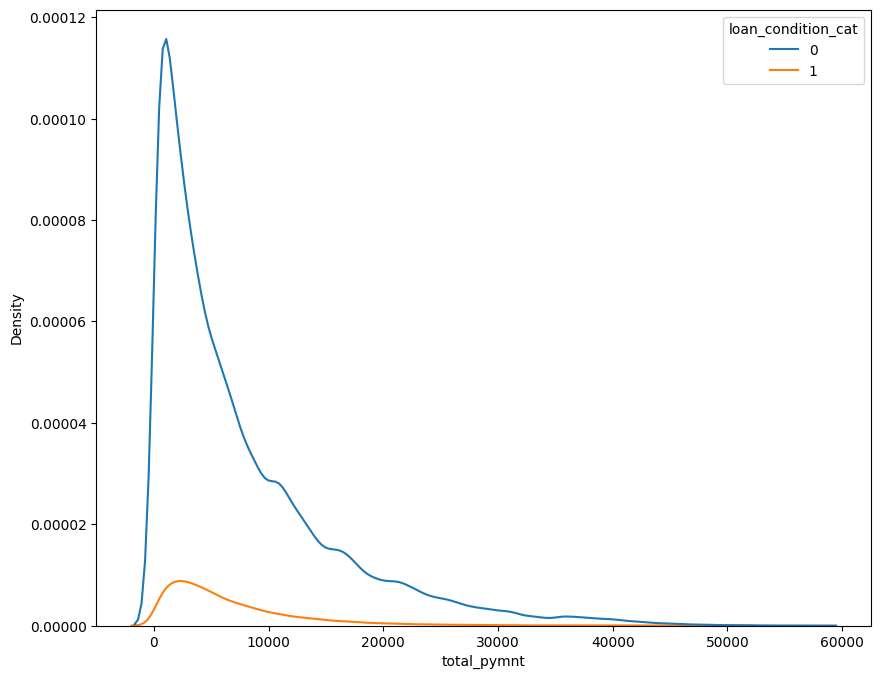

Describe for column devided by loan condition:
                       count         mean          std  min        25%  \
loan_condition_cat                                                       
0                   573965.0  7654.661649  8022.363910  0.0  1868.3900   
1                    47200.0  6397.313833  5621.141054  0.0  2438.0025   

                         50%         75%          max  
loan_condition_cat                                     
0                   4903.200  10830.1600  57777.57987  
1                   4786.845   8647.5025  50197.03000  
-----------------------------------------------------------
Describe for column:  total_rec_prncp
count    621165.000000
mean       5757.954269
std        6626.464100
min           0.000000
25%        1200.000000
50%        3211.690000
75%        8000.000000
max       35000.020000
Name: total_rec_prncp, dtype: float64


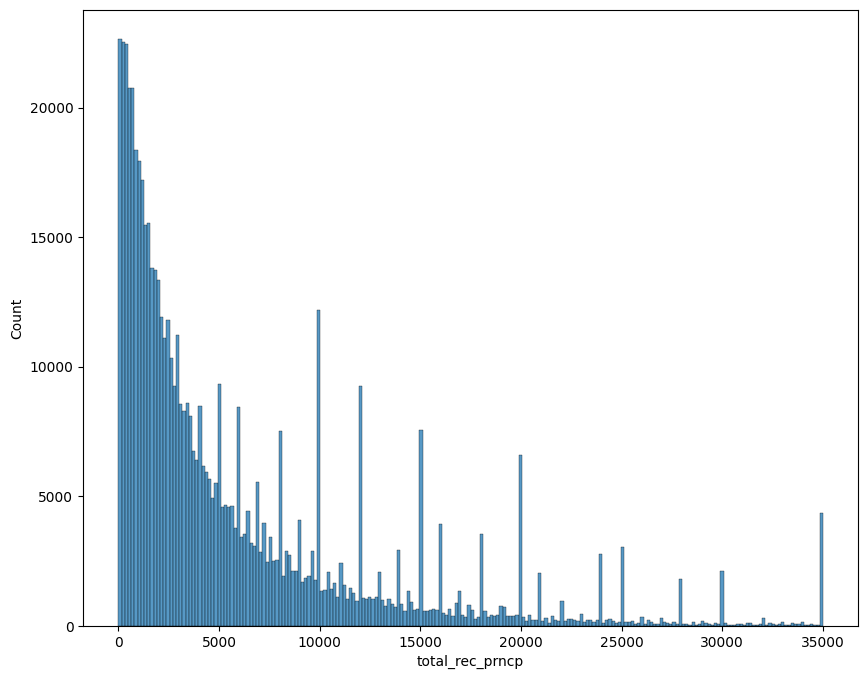

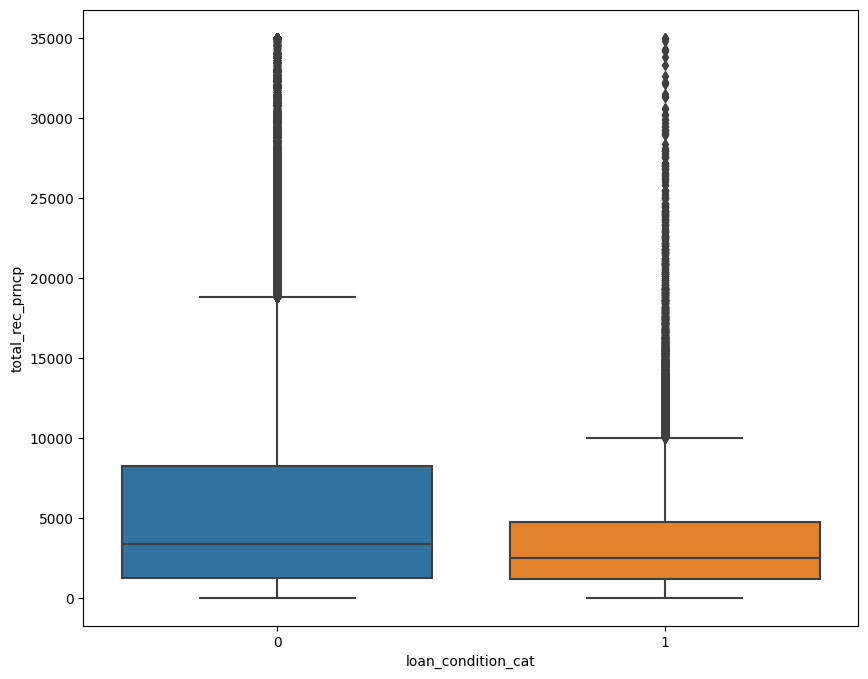

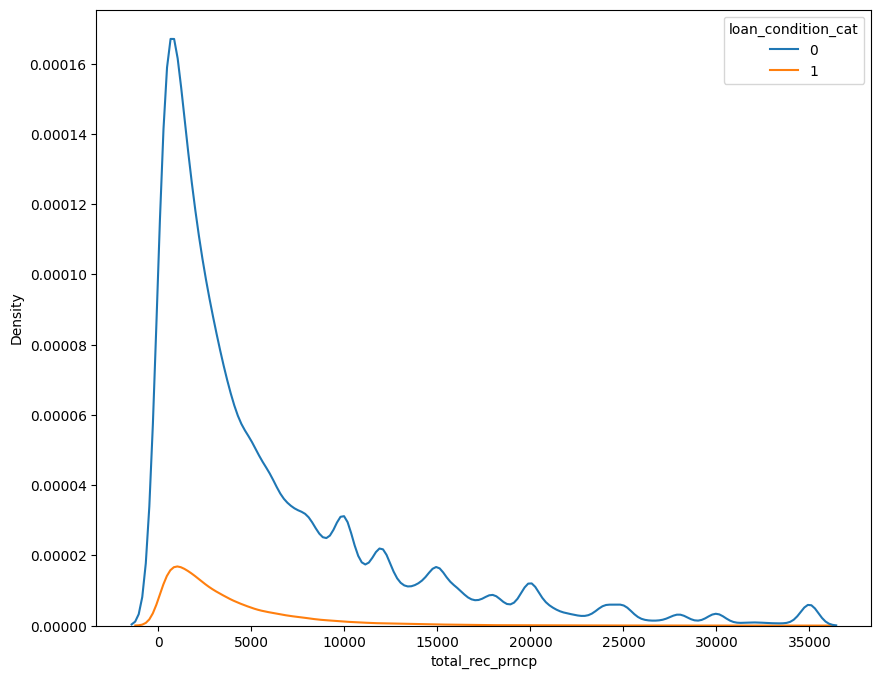

Describe for column devided by loan condition:
                       count         mean          std  min      25%  \
loan_condition_cat                                                     
0                   573965.0  5940.659227  6785.718899  0.0  1202.86   
1                    47200.0  3536.211664  3548.870223  0.0  1157.43   

                         50%        75%       max  
loan_condition_cat                                 
0                   3324.450  8226.2300  35000.02  
1                   2444.035  4693.4275  35000.00  
-----------------------------------------------------------
Describe for column:  recoveries
count    621165.000000
mean         46.057492
std         412.662448
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       31900.520000
Name: recoveries, dtype: float64


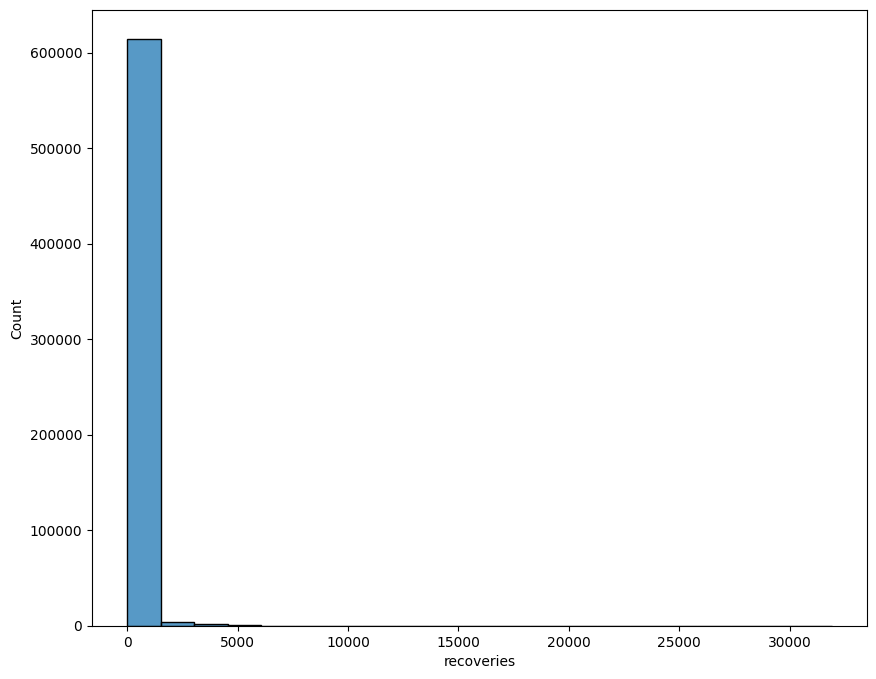

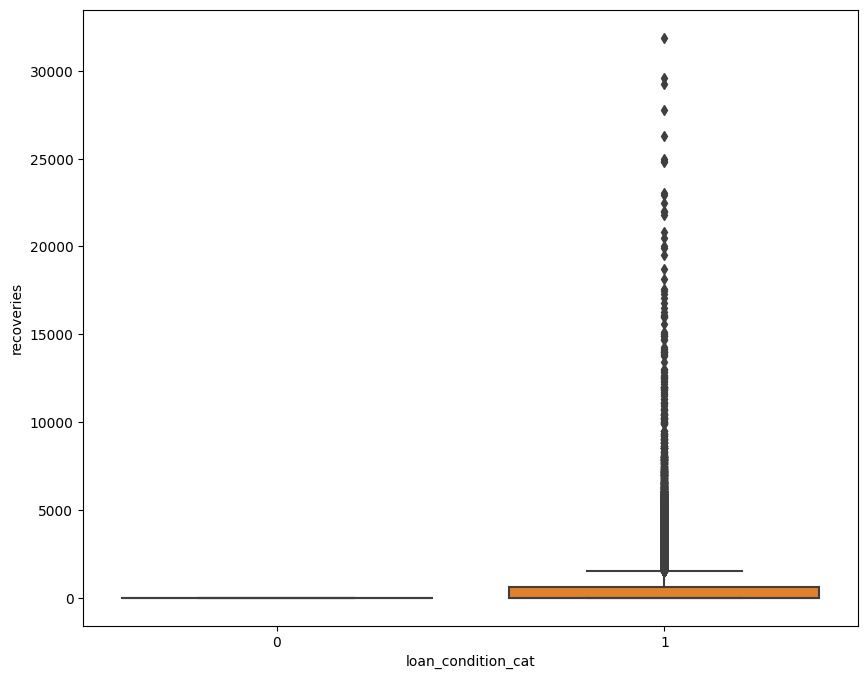

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1599/2491288910.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=eda_train,x=col, hue='loan_condition_cat')


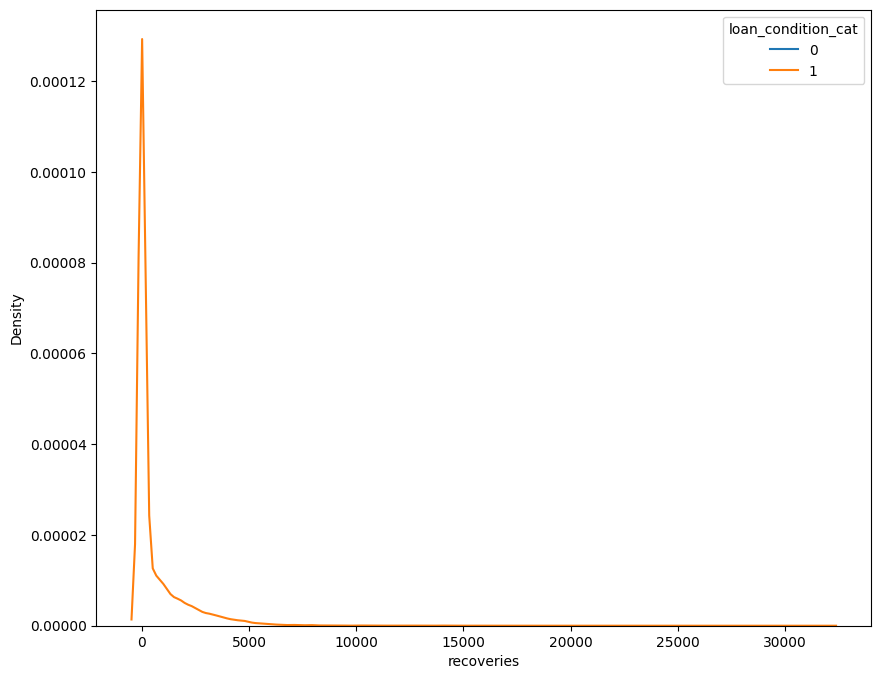

Describe for column devided by loan condition:
                       count        mean          std  min  25%  50%  \
loan_condition_cat                                                     
0                   573965.0    0.000000     0.000000  0.0  0.0  0.0   
1                    47200.0  606.129283  1378.995275  0.0  0.0  0.0   

                         75%       max  
loan_condition_cat                      
0                     0.0000      0.00  
1                   609.5425  31900.52  
-----------------------------------------------------------
Describe for column:  installment
count    621165.000000
mean        436.757518
std         244.148416
min          15.670000
25%         260.640000
50%         382.550000
75%         572.670000
max        1445.460000
Name: installment, dtype: float64


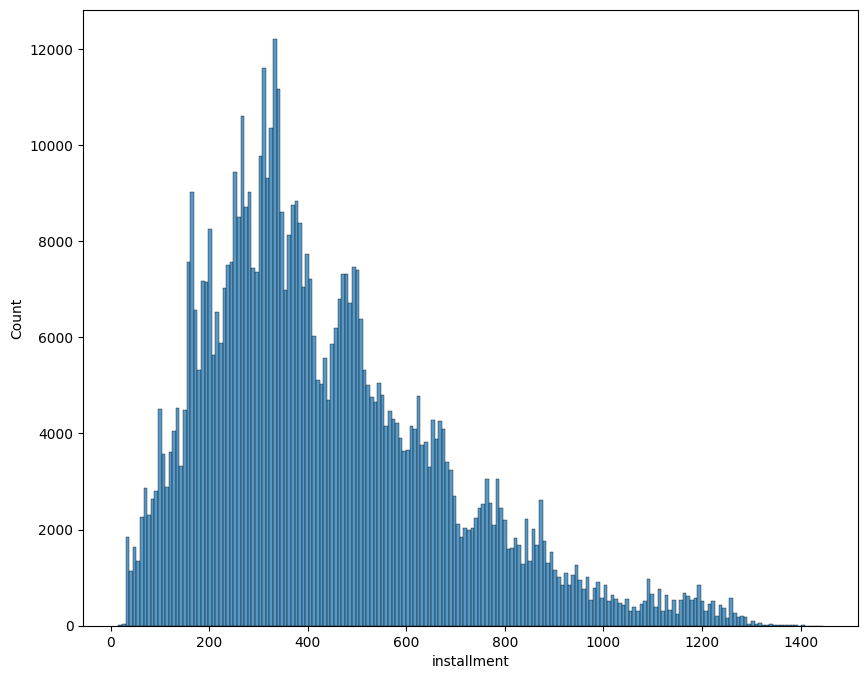

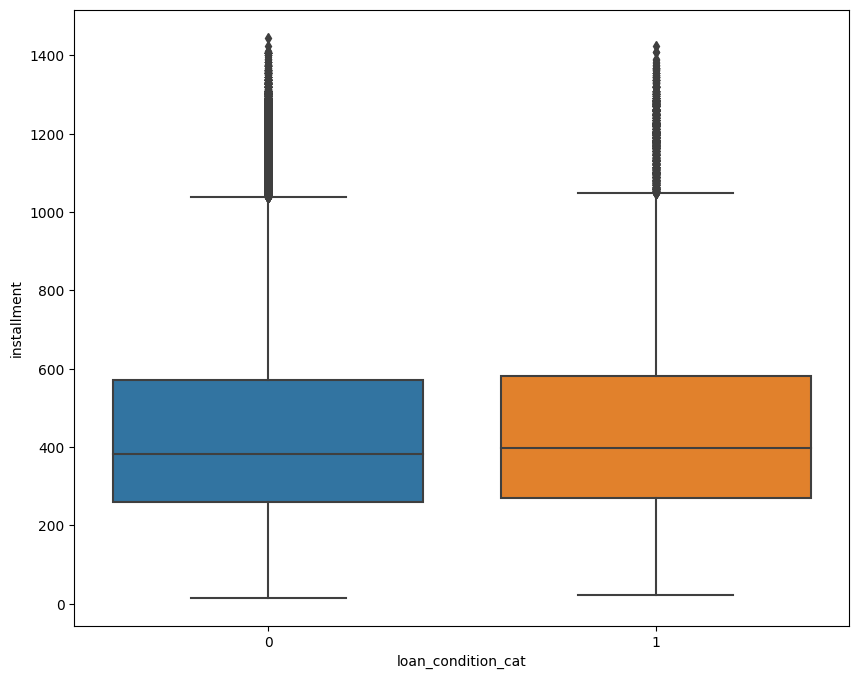

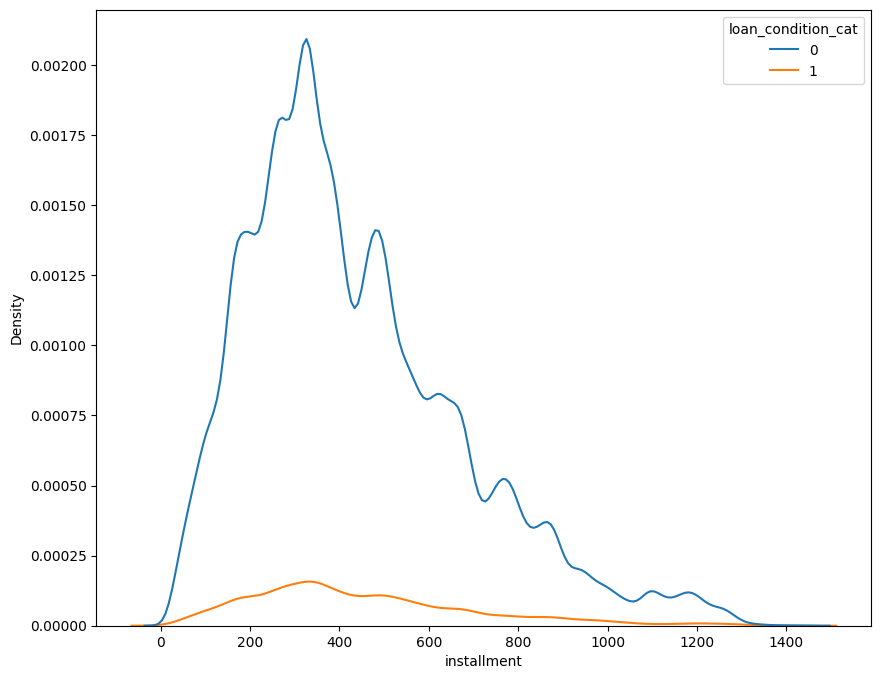

Describe for column devided by loan condition:
                       count        mean         std    min       25%  \
loan_condition_cat                                                      
0                   573965.0  435.724855  243.685840  15.67  259.8000   
1                    47200.0  449.314980  249.365596  21.59  270.8275   

                        50%     75%      max  
loan_condition_cat                            
0                   382.030  571.56  1445.46  
1                   397.225  582.08  1424.57  
-----------------------------------------------------------


/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1599/2491288910.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True)


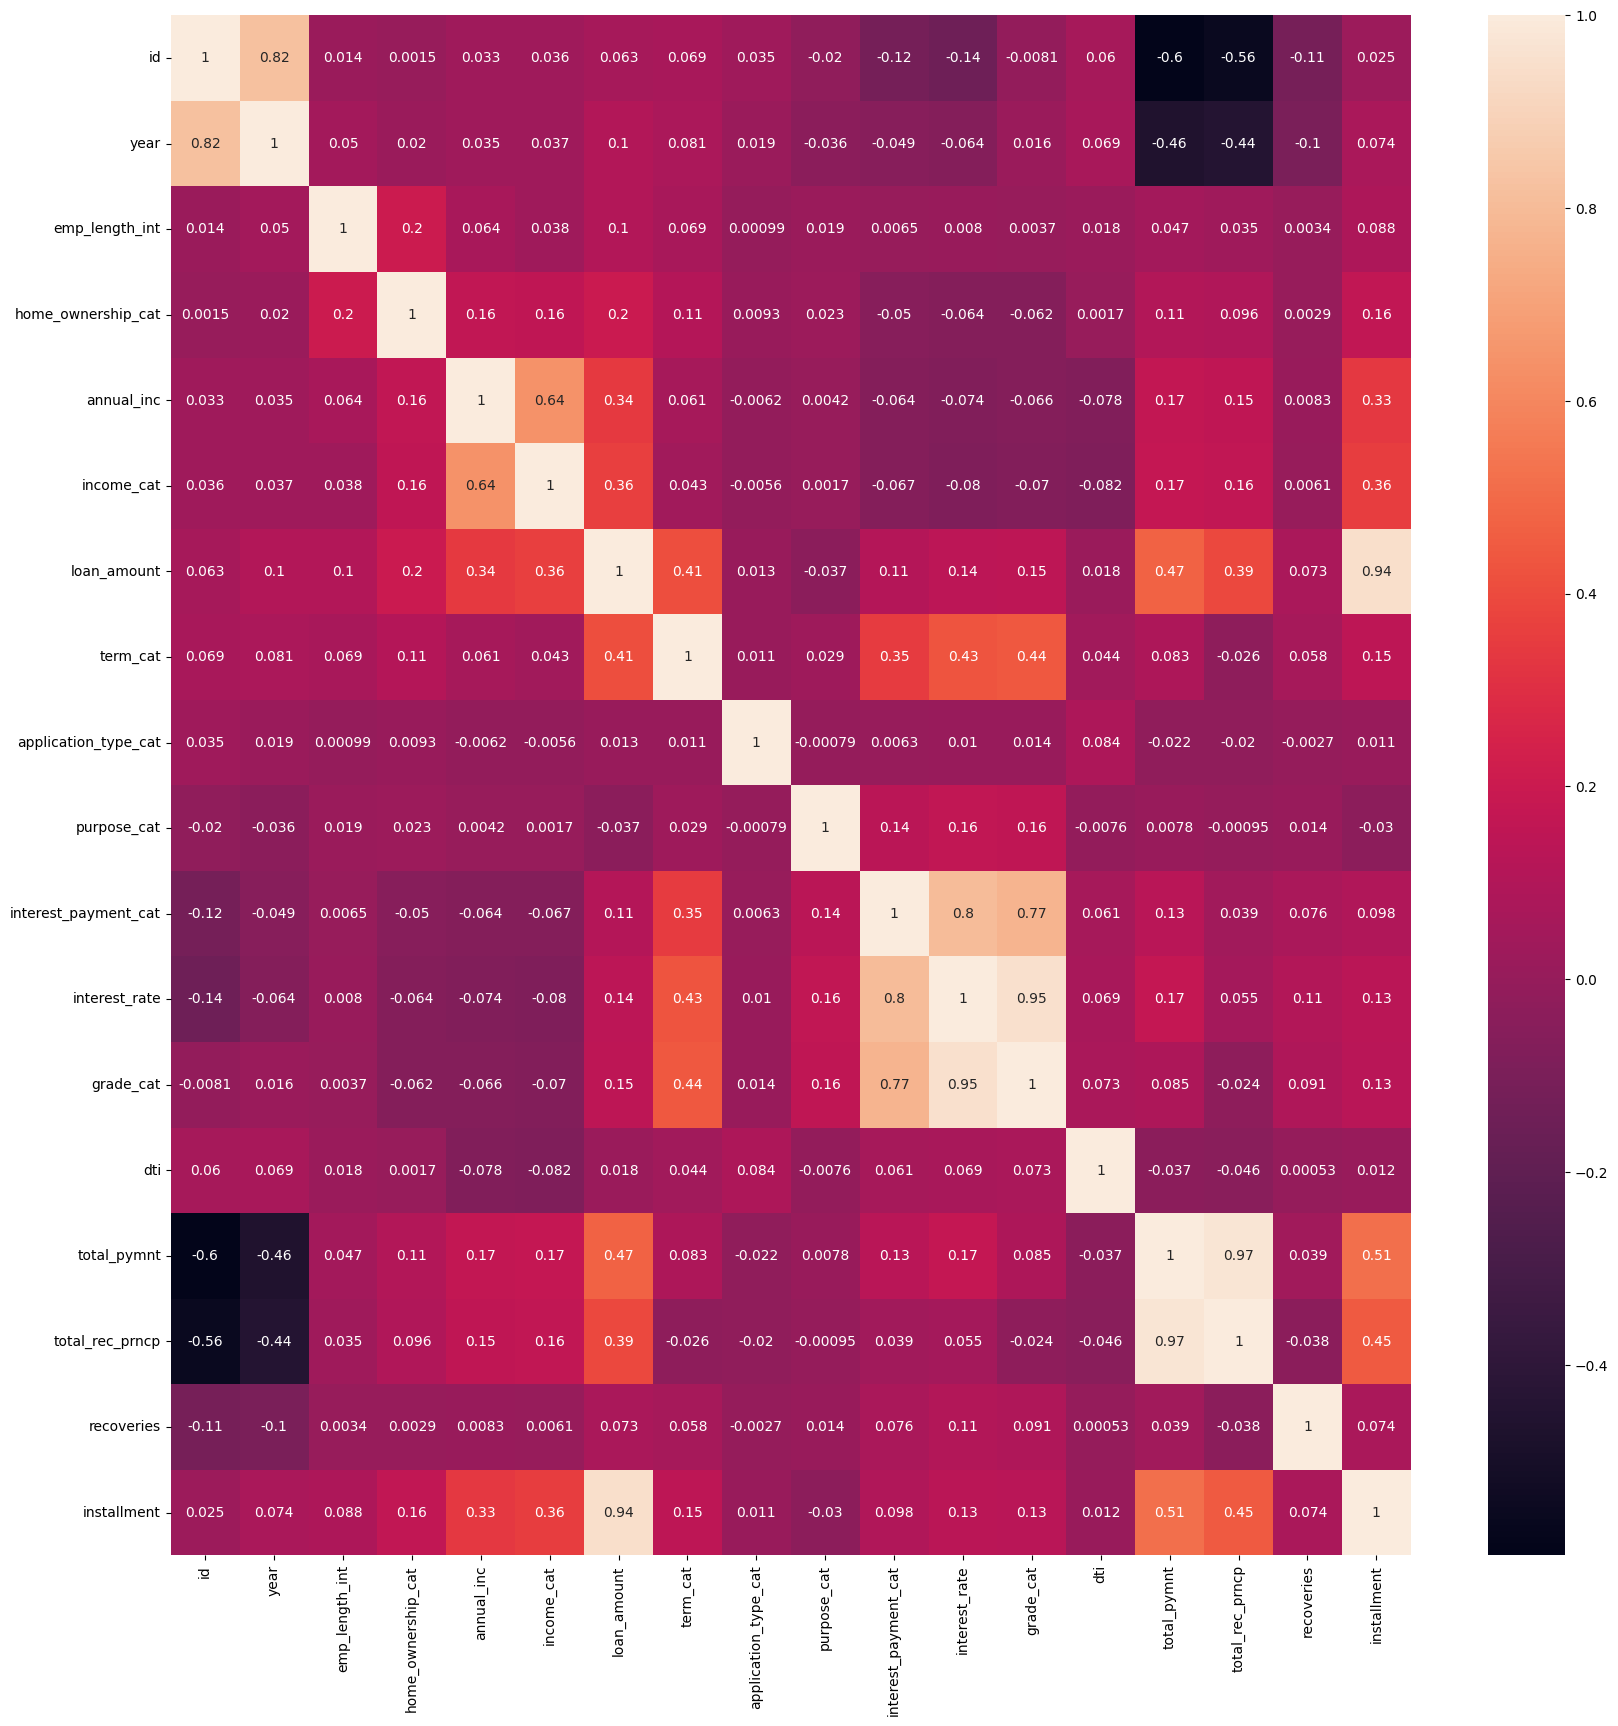

In [7]:
eda_train=new_eda(X_train,y_train)

In [8]:
print(X_train.shape)

(621165, 29)


In [9]:
#create cleaning function
def clean_train(X_train, y_train):

    # Drop columns that cause multicollinearity
    X_train = X_train.drop(['year','interest_payment_cat', 'income_cat',
                          'installment', 'grade_cat', 'total_pymnt'], axis=1)
    
    num=X_train[['dti','annual_inc']]
    #remove outliers using iqr
    Q1=num.quantile(0.25)
    Q3=num.quantile(0.75)
    IQR=Q3-Q1
    print(IQR)
    X_train=X_train[~((num<(Q1-1.5*IQR))|(num>(Q3+1.5*IQR))).any(axis=1)]
    y_train=y_train.loc[X_train.index]

    print(X_train.shape, y_train.shape)
    return X_train, y_train

def clean_test(X_test, y_test):

    # Drop columns that cause multicollinearity
    X_test = X_test.drop(['year', 'interest_payment_cat', 'income_cat', 'installment', 'grade_cat', 'total_pymnt'], axis=1)
    
    return X_test, y_test

In [10]:
X_train,y_train=clean_train(X_train,y_train)

dti              12.03
annual_inc    45000.00
dtype: float64
(593345, 23) (593345,)


In [11]:
X_test,y_test=clean_test(X_test,y_test)

In [12]:
X_train.columns.to_list()

['id',
 'issue_d',
 'final_d',
 'emp_length_int',
 'home_ownership',
 'home_ownership_cat',
 'income_category',
 'annual_inc',
 'loan_amount',
 'term',
 'term_cat',
 'application_type',
 'application_type_cat',
 'purpose',
 'purpose_cat',
 'interest_payments',
 'loan_condition',
 'interest_rate',
 'grade',
 'dti',
 'total_rec_prncp',
 'recoveries',
 'region']

In [13]:
X_traincop=X_train.copy()
y_traincop=y_train.copy()

y_traincop.columns=['loan_condition_cat']

data_train=pd.concat([X_traincop,y_traincop],axis=1)

data_train.head()

,id,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,loan_condition,interest_rate,grade,dti,total_rec_prncp,recoveries,region,loan_condition_cat
696983,54424209,2015-01-07,2016-10-01,0.5,RENT,1,Low,35000,12950,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,7.89,A,26.30,1951.86,0.0,leinster,0
67504,8645621,2013-01-11,2016-10-01,0.5,MORTGAGE,3,Low,96000,20000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.90,A,17.86,13899.03,0.0,ulster,0
600763,60810500,2015-01-09,2015-11-02,10.0,RENT,1,Low,94000,30000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,11.53,B,11.11,2124.66,0.0,Northern-Irl,0
93639,7088555,2013-01-09,2015-10-08,0.5,RENT,1,Low,45000,2500,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,Good Loan,10.64,B,12.67,2500.00,0.0,cannught,0
650212,57205328,2015-01-08,2016-10-01,10.0,MORTGAGE,3,Low,32000,8575,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,Good Loan,17.57,D,23.82,940.22,0.0,munster,0


In [14]:
def create_binning(data, predictors, num_of_bins):
    data [predictors+"_bin"] =pd.qcut(data[predictors], q=num_of_bins,
    duplicates='drop')
    return data

In [15]:
num_columns=data_train[['emp_length_int','annual_inc',
                            'loan_amount','interest_rate','dti',
                            'total_rec_prncp','recoveries']]

In [16]:
data_train

,id,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,loan_condition,interest_rate,grade,dti,total_rec_prncp,recoveries,region,loan_condition_cat
696983,54424209,2015-01-07,2016-10-01,0.50,RENT,1,Low,35000,12950,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,7.89,A,26.30,1951.86,0.0,leinster,0
67504,8645621,2013-01-11,2016-10-01,0.50,MORTGAGE,3,Low,96000,20000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.90,A,17.86,13899.03,0.0,ulster,0
600763,60810500,2015-01-09,2015-11-02,10.00,RENT,1,Low,94000,30000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,11.53,B,11.11,2124.66,0.0,Northern-Irl,0
93639,7088555,2013-01-09,2015-10-08,0.50,RENT,1,Low,45000,2500,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,Good Loan,10.64,B,12.67,2500.00,0.0,cannught,0
650212,57205328,2015-01-08,2016-10-01,10.00,MORTGAGE,3,Low,32000,8575,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,Good Loan,17.57,D,23.82,940.22,0.0,munster,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62855,8376381,2013-01-11,2014-10-03,10.00,MORTGAGE,3,Low,65000,7800,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,6.03,A,12.91,7800.00,0.0,Northern-Irl,0
882220,38634544,2015-01-01,2016-10-01,6.05,RENT,1,Low,31000,4000,36 months,1,INDIVIDUAL,1,home_improvement,7,Low,Good Loan,11.99,B,21.97,1177.81,0.0,ulster,0
304681,27502103,2014-01-10,2016-10-01,10.00,RENT,1,Low,36004,12000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.39,A,25.07,4637.24,0.0,munster,0
587036,61410256,2015-01-10,2016-10-01,10.00,MORTGAGE,3,Low,65000,8500,36 months,1,INDIVIDUAL,1,credit_card,1,High,Good Loan,13.33,C,5.21,586.48,0.0,cannught,0


In [17]:
cat_columns=data_train[['home_ownership','income_category',
                        'term','application_type','purpose','interest_payments',
                        'grade','region']]

In [18]:
for col in num_columns:
    data_train_binned=create_binning(data=data_train, predictors=col, num_of_bins=6)

In [19]:
data_train_binned.head(10).T

,696983,67504,600763,93639,650212,561423,327624,70587,209780,291009
id,54424209,8645621,60810500,7088555,57205328,63064648,24045052,8265196,1395608,29664127
issue_d,2015-01-07 00:00:00,2013-01-11 00:00:00,2015-01-09 00:00:00,2013-01-09 00:00:00,2015-01-08 00:00:00,2015-01-10 00:00:00,2014-01-08 00:00:00,2013-01-11 00:00:00,2012-01-07 00:00:00,2014-01-10 00:00:00
final_d,2016-10-01 00:00:00,2016-10-01 00:00:00,2015-11-02 00:00:00,2015-10-08 00:00:00,2016-10-01 00:00:00,2016-10-01 00:00:00,2016-10-01 00:00:00,2016-10-01 00:00:00,2015-10-01 00:00:00,2016-10-01 00:00:00
emp_length_int,0.5,0.5,10.0,0.5,10.0,10.0,10.0,9.0,8.0,10.0
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT,MORTGAGE,MORTGAGE
home_ownership_cat,1,3,1,1,3,1,3,1,3,3
income_category,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
annual_inc,35000,96000,94000,45000,32000,36000,63000,52000,30000,55000
loan_amount,12950,20000,30000,2500,8575,7025,20000,23100,2700,9000
term,36 months,36 months,36 months,36 months,36 months,36 months,60 months,60 months,36 months,36 months


In [20]:
data_train_binned.head()

,id,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,loan_condition,interest_rate,grade,dti,total_rec_prncp,recoveries,region,loan_condition_cat,emp_length_int_bin,annual_inc_bin,loan_amount_bin,interest_rate_bin,dti_bin,total_rec_prncp_bin,recoveries_bin
696983,54424209,2015-01-07,2016-10-01,0.5,RENT,1,Low,35000,12950,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,7.89,A,26.30,1951.86,0.0,leinster,0,"(0.499, 2.0]","(1895.999, 40000.0]","(12350.0, 16750.0]","(5.319, 8.39]","(21.92, 26.99]","(1712.103, 3144.86]","(-0.001, 31900.52]"
67504,8645621,2013-01-11,2016-10-01,0.5,MORTGAGE,3,Low,96000,20000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.90,A,17.86,13899.03,0.0,ulster,0,"(0.499, 2.0]","(75000.0, 98000.0]","(16750.0, 22825.0]","(8.39, 11.14]","(14.21, 17.98]","(10470.807, 35000.02]","(-0.001, 31900.52]"
600763,60810500,2015-01-09,2015-11-02,10.0,RENT,1,Low,94000,30000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,11.53,B,11.11,2124.66,0.0,Northern-Irl,0,"(9.0, 10.0]","(75000.0, 98000.0]","(22825.0, 35000.0]","(11.14, 12.99]","(9.98, 14.21]","(1712.103, 3144.86]","(-0.001, 31900.52]"
93639,7088555,2013-01-09,2015-10-08,0.5,RENT,1,Low,45000,2500,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,Good Loan,10.64,B,12.67,2500.00,0.0,cannught,0,"(0.499, 2.0]","(40000.0, 50000.0]","(499.999, 6000.0]","(8.39, 11.14]","(9.98, 14.21]","(1712.103, 3144.86]","(-0.001, 31900.52]"
650212,57205328,2015-01-08,2016-10-01,10.0,MORTGAGE,3,Low,32000,8575,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,Good Loan,17.57,D,23.82,940.22,0.0,munster,0,"(9.0, 10.0]","(1895.999, 40000.0]","(6000.0, 10000.0]","(14.74, 17.57]","(21.92, 26.99]","(740.07, 1712.103]","(-0.001, 31900.52]"


In [21]:
data_train_binned.reset_index(drop=True)

,id,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,loan_amount,term,term_cat,application_type,application_type_cat,purpose,purpose_cat,interest_payments,loan_condition,interest_rate,grade,dti,total_rec_prncp,recoveries,region,loan_condition_cat,emp_length_int_bin,annual_inc_bin,loan_amount_bin,interest_rate_bin,dti_bin,total_rec_prncp_bin,recoveries_bin
0,54424209,2015-01-07,2016-10-01,0.50,RENT,1,Low,35000,12950,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,7.89,A,26.30,1951.86,0.0,leinster,0,"(0.499, 2.0]","(1895.999, 40000.0]","(12350.0, 16750.0]","(5.319, 8.39]","(21.92, 26.99]","(1712.103, 3144.86]","(-0.001, 31900.52]"
1,8645621,2013-01-11,2016-10-01,0.50,MORTGAGE,3,Low,96000,20000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.90,A,17.86,13899.03,0.0,ulster,0,"(0.499, 2.0]","(75000.0, 98000.0]","(16750.0, 22825.0]","(8.39, 11.14]","(14.21, 17.98]","(10470.807, 35000.02]","(-0.001, 31900.52]"
2,60810500,2015-01-09,2015-11-02,10.00,RENT,1,Low,94000,30000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,11.53,B,11.11,2124.66,0.0,Northern-Irl,0,"(9.0, 10.0]","(75000.0, 98000.0]","(22825.0, 35000.0]","(11.14, 12.99]","(9.98, 14.21]","(1712.103, 3144.86]","(-0.001, 31900.52]"
3,7088555,2013-01-09,2015-10-08,0.50,RENT,1,Low,45000,2500,36 months,1,INDIVIDUAL,1,debt_consolidation,6,Low,Good Loan,10.64,B,12.67,2500.00,0.0,cannught,0,"(0.499, 2.0]","(40000.0, 50000.0]","(499.999, 6000.0]","(8.39, 11.14]","(9.98, 14.21]","(1712.103, 3144.86]","(-0.001, 31900.52]"
4,57205328,2015-01-08,2016-10-01,10.00,MORTGAGE,3,Low,32000,8575,36 months,1,INDIVIDUAL,1,debt_consolidation,6,High,Good Loan,17.57,D,23.82,940.22,0.0,munster,0,"(9.0, 10.0]","(1895.999, 40000.0]","(6000.0, 10000.0]","(14.74, 17.57]","(21.92, 26.99]","(740.07, 1712.103]","(-0.001, 31900.52]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593340,8376381,2013-01-11,2014-10-03,10.00,MORTGAGE,3,Low,65000,7800,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,6.03,A,12.91,7800.00,0.0,Northern-Irl,0,"(9.0, 10.0]","(62000.0, 75000.0]","(6000.0, 10000.0]","(5.319, 8.39]","(9.98, 14.21]","(5692.85, 10470.807]","(-0.001, 31900.52]"
593341,38634544,2015-01-01,2016-10-01,6.05,RENT,1,Low,31000,4000,36 months,1,INDIVIDUAL,1,home_improvement,7,Low,Good Loan,11.99,B,21.97,1177.81,0.0,ulster,0,"(4.0, 6.05]","(1895.999, 40000.0]","(499.999, 6000.0]","(11.14, 12.99]","(21.92, 26.99]","(740.07, 1712.103]","(-0.001, 31900.52]"
593342,27502103,2014-01-10,2016-10-01,10.00,RENT,1,Low,36004,12000,36 months,1,INDIVIDUAL,1,credit_card,1,Low,Good Loan,8.39,A,25.07,4637.24,0.0,munster,0,"(9.0, 10.0]","(1895.999, 40000.0]","(10000.0, 12350.0]","(5.319, 8.39]","(21.92, 26.99]","(3144.86, 5692.85]","(-0.001, 31900.52]"
593343,61410256,2015-01-10,2016-10-01,10.00,MORTGAGE,3,Low,65000,8500,36 months,1,INDIVIDUAL,1,credit_card,1,High,Good Loan,13.33,C,5.21,586.48,0.0,cannught,0,"(9.0, 10.0]","(62000.0, 75000.0]","(6000.0, 10000.0]","(12.99, 14.74]","(-0.001, 9.98]","(-0.001, 740.07]","(-0.001, 31900.52]"


In [22]:
respon_var=data_train['loan_condition_cat']

In [23]:
crosstab_num=[]

for column in num_columns:
    crosstab=pd.crosstab(data_train_binned[column+'_bin'], respon_var, margins=True)
    crosstab_num.append(crosstab)


In [24]:
crosstab_cat=[]
for column in cat_columns:
    crosstab=pd.crosstab(data_train_binned[column], respon_var,margins=True)
    crosstab_cat.append(crosstab)
   

In [25]:
crosstab_list=crosstab_num+crosstab_cat

In [26]:
crosstab_list

[loan_condition_cat       0      1     All
 emp_length_int_bin                       
 (0.499, 2.0]        126773  11060  137833
 (2.0, 4.0]           75464   6425   81889
 (4.0, 6.05]          88933   8254   97187
 (6.05, 9.0]          75864   6576   82440
 (9.0, 10.0]         180552  13444  193996
 All                 547586  45759  593345,
 loan_condition_cat        0      1     All
 annual_inc_bin                            
 (1895.999, 40000.0]  103364  11208  114572
 (40000.0, 50000.0]    81448   7754   89202
 (50000.0, 62000.0]    88979   7890   96869
 (62000.0, 75000.0]    88583   6857   95440
 (75000.0, 98000.0]    94007   6613  100620
 (98000.0, 157500.0]   91205   5437   96642
 All                  547586  45759  593345,
 loan_condition_cat       0      1     All
 loan_amount_bin                          
 (499.999, 6000.0]    93049   7299  100348
 (6000.0, 10000.0]   121174  10046  131220
 (10000.0, 12350.0]   60105   5020   65125
 (12350.0, 16750.0]   91470   7622   99092


In [27]:
WOE_list=[]
IV_list=[]

IV_table=pd.DataFrame({'Characteristic:':[],
                       'information_value:':[]})


for crosstab in crosstab_list:
    
    crosstab['p_good']=crosstab[0]/crosstab[0]['All']

    crosstab['p_bad']=crosstab[1]/crosstab[1]['All']

    crosstab['WOE']=np.log(crosstab['p_good']/crosstab['p_bad'])

    crosstab['contribution']=crosstab['WOE']*(crosstab['p_good']-crosstab['p_bad'])

    IV=crosstab['contribution'] [:-1].sum()

    add_IV={'Characteristic:':crosstab.index.name,
            'information_value:':IV}
    WOE_list.append(crosstab)
    IV_list.append(add_IV)

In [28]:
WOE_list

[loan_condition_cat       0      1     All    p_good     p_bad       WOE  \
 emp_length_int_bin                                                        
 (0.499, 2.0]        126773  11060  137833  0.231512  0.241701 -0.043068   
 (2.0, 4.0]           75464   6425   81889  0.137812  0.140410 -0.018672   
 (4.0, 6.05]          88933   8254   97187  0.162409  0.180380 -0.104946   
 (6.05, 9.0]          75864   6576   82440  0.138543  0.143709 -0.036615   
 (9.0, 10.0]         180552  13444  193996  0.329724  0.293800  0.115355   
 All                 547586  45759  593345  1.000000  1.000000  0.000000   
 
 loan_condition_cat  contribution  
 emp_length_int_bin                
 (0.499, 2.0]            0.000439  
 (2.0, 4.0]              0.000048  
 (4.0, 6.05]             0.001886  
 (6.05, 9.0]             0.000189  
 (9.0, 10.0]             0.004144  
 All                     0.000000  ,
 loan_condition_cat        0      1     All    p_good     p_bad       WOE  \
 annual_inc_bin         

In [29]:
IV_table=IV_table.append(IV_list,ignore_index=True)
IV_table

/var/folders/r_/0zt7_hb10179rdt5t_5rl9t80000gn/T/ipykernel_1599/2942859051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_table=IV_table.append(IV_list,ignore_index=True)


,Characteristic:,information_value:
0,emp_length_int_bin,0.006706
1,annual_inc_bin,0.039636
2,loan_amount_bin,0.001150
3,interest_rate_bin,0.443589
4,dti_bin,0.008994
5,total_rec_prncp_bin,0.235259
6,recoveries_bin,0.000000
7,home_ownership,inf
8,income_category,0.017600
9,term,0.021742


In [30]:
strength=[]

for IV in IV_table['information_value:']:
    if IV < 0.02:
        strength.append('useless for prediction')
    elif IV >= 0.02 and IV < 0.1:
        strength.append('weak predictor')
    elif IV >= 0.1 and IV < 0.3:
        strength.append('medium predictor')
    elif IV >= 0.3 and IV < 0.5:
        strength.append('strong predictor')
    else:
        strength.append('suspicious or too good to be true')

IV_table=IV_table.assign(Strength=strength)

IV_table.sort_values(by='information_value:', ascending=False)

,Characteristic:,information_value:,Strength
7,home_ownership,inf,suspicious or too good to be true
3,interest_rate_bin,0.443589,strong predictor
13,grade,0.317858,strong predictor
12,interest_payments,0.293680,medium predictor
5,total_rec_prncp_bin,0.235259,medium predictor
11,purpose,0.044606,weak predictor
1,annual_inc_bin,0.039636,weak predictor
9,term,0.021742,weak predictor
8,income_category,0.017600,useless for prediction
4,dti_bin,0.008994,useless for prediction
